<a href="https://colab.research.google.com/github/lujainAziz/LujainAlmajyul-it326/blob/main/Reports%20Folder/Phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Phase 3 – Data Mining on Students Performance Dataset

## Executive Summary

Phase 3 of this project applied two core data mining techniques—Decision Tree classification and K-means clustering—to analyze the Students Performance Dataset. The goal was to predict student grade categories and uncover hidden behavioral patterns.

The classification model showed that GPA, absences, study time, and parental support strongly influence academic performance. Meanwhile, clustering revealed three distinct groups of students that reflect real academic profiles: high performers, low performers, and average students.

The results are highly interpretable and directly applicable to educational decision-making, providing a strong foundation for identifying at-risk students and enhancing learning strategies.


---

## [1] Problem

The main problem addressed in this project is predicting and understanding students' academic performance. This is important because early identification of low-performing students helps educators provide timely support, improve learning strategies, and enhance academic outcomes.

To solve this problem, we apply:

- **Classification** to predict student grade categories.
- **Clustering** to discover hidden behavioral patterns among students based on their characteristics.

---

## [2] Data Mining Task

We formalize the problem into two data mining tasks:

### 2.1 Classification Task

- **Goal:** Predict the `GradeClass` (A–F encoded as 0–4) for each student.
- **Input features:** Demographic, behavioral, and academic variables such as:
  - Study time
  - Parental support
  - Absences
  - GPA
  - Extracurricular activities and tutoring
- **Output:** A predicted performance category for each student.

### 2.2 Clustering Task

- **Goal:** Group students into natural clusters based on their characteristics, without using the `GradeClass` label.
- **Purpose:** Understand different profiles of students (e.g., high-performing, low-performing, average) and their behaviors to support decision-making in education.

---

## [3] Data

### **Dataset Name**
Students Performance Dataset

### **Dataset Source**
https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset

### **Sample of the Raw Dataset**

The sample shown below represents the original unmodified data before applying any preprocessing steps.


In [151]:
# Basic imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Clone repo if not exists
repo_path = "/content/LujainAlmajyul-it326"

# Load RAW dataset
raw_df = pd.read_csv("/content/LujainAlmajyul-it326/Dataset/Raw_dataset.csv")
print("Sample of the raw dataset:")
raw_df.head()


Sample of the raw dataset:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


## **Dataset Description**

The dataset used in this project is the **Students Performance Dataset**, containing **2,392** student records and **15** original attributes that describe demographic, behavioral, and academic factors. The main attributes include:

- **Demographic attributes**
  - `Age`, `Gender`, `Ethnicity`
- **Family background**
  - `ParentalEducation`, `ParentalSupport`
- **Learning indicators**
  - `StudyTimeWeekly`, `Absences`, `Tutoring`
- **Activities**
  - `Extracurricular`, `Sports`, `Music`, `Volunteering`
- **Academic performance**
  - `GPA`, `GradeClass` (target class label)

The `GradeClass` attribute is encoded as five categories:

- **4 → A** (1211 students)
- **3 → B** (414 students)
- **2 → C** (391 students)
- **1 → D** (269 students)
- **0 → F** (107 students)

This distribution shows that the dataset is **imbalanced**, with high-performing students (Class 4) forming the majority class, while failing students (Class 0) are under-represented.

---

## [4] Data Preprocessing

Several preprocessing steps were applied to improve data quality and prepare the dataset for machine learning models.


### **4.1 Missing Values Check**

- The dataset contains **no missing values** in any column.
- Therefore, no imputation or removal of rows was necessary.

### **4.2 Noise & Outlier Detection**

- Outliers were examined using:
  - Boxplots
  - IQR method
- The following features were checked:
  - `GPA`
  - `StudyTimeWeekly`
  - `Absences`
- No significant extreme outliers were found, so no removal or capping was required.


### **4.3 Variable Transformation**

- The `StudyTimeWeekly` feature showed slight skewness.
- A **Yeo–Johnson PowerTransformer** was applied to normalize its distribution and stabilize variance.
- The transformed version is stored as:
  - `StudyTimeWeekly_transformed`


### **4.4 Scaling / Normalization**

- The features `GPA` and `Absences` have different numeric ranges.
- To balance their contribution to the model, both were normalized using **StandardScaler**, resulting in:
  - `GPA_scaled`
  - `Absences_scaled`


### **4.5 Discretization**

- To improve interpretability of classification results, the `GPA` feature was discretized into four bins using **quantile-based KBinsDiscretizer**.
- The resulting feature:
  - `GPA_binned` (values range from 0 to 3 representing increasing GPA levels)


### **4.6 Encoding**

- All categorical variables in the raw dataset were already provided as numerical codes, including:
  - `Gender` → 0 (Male), 1 (Female)
  - `ParentalEducation` → 0–4
  - `ParentalSupport` → 0–4
  - Activity indicators → 0 (No), 1 (Yes)
- Therefore, **no additional label encoding** was necessary.



### **4.7 Correlation Analysis**

- A correlation heatmap was generated to study relationships among variables.
- Key findings:
  - **GPA** is strongly negatively correlated with **Absences**.
  - **GPA** positively correlates with **ParentalSupport** and **StudyTimeWeekly**.
  - **GradeClass** strongly correlates with **GPA**, validating the label’s meaning.



### **4.8 Final Preprocessed Dataset**

After preprocessing, the dataset includes all original attributes plus the engineered features:

- `StudyTimeWeekly_transformed`
- `GPA_scaled`
- `Absences_scaled`
- `GPA_binned`

These processed features were used for all classification and clustering tasks in Phase 3.



### **Snapshot After Preprocessing**

This snapshot confirms that transformation, scaling, and discretization were applied successfully.

In [152]:
# Load PREPROCESSED dataset
df = pd.read_csv("/content/LujainAlmajyul-it326/Dataset/Preprocessed_dataset.csv")
print("Snapshot after preprocessing:")
df.head()

Snapshot after preprocessing:


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,StudyTimeWeekly_transformed,GPA_scaled,Absences_scaled,GPA_binned
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1.624898,1.118086,-0.890822,3.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0.982232,1.242374,-1.717694,3.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,-0.952350,-1.960277,1.353542,0.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,0.127953,0.161790,-0.063951,2.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,-0.856924,-0.675573,0.290422,1.0


---

## [5] Data Mining Technique

In this phase, we apply two main data mining techniques to the Students Performance Dataset.

### 5.1 Decision Tree Classification

We use the **DecisionTreeClassifier** from `sklearn.tree` to predict the `GradeClass` attribute, which represents student performance levels (0–4, corresponding to F, D, C, B, and A).

**Input features (X):**

- Age, Gender, Ethnicity, ParentalEducation  
- StudyTimeWeekly_transformed, Absences_scaled  
- Tutoring, ParentalSupport  
- Extracurricular, Sports, Music, Volunteering  
- GPA_scaled  

**Target (y):**

- `GradeClass` (0–4)

**Attribute selection measures (splitting criteria):**

- **Gini index** (`criterion="gini"`)
- **Information Gain (Entropy)** (`criterion="entropy"`)

**Train–test partitions:**

We evaluate three train–test splits:

- 60% training – 40% testing  
- 70% training – 30% testing  
- 80% training – 20% testing  

For each configuration, we compute:

- Accuracy  
- Macro-averaged Precision  
- Macro-averaged Recall  
- Macro-averaged F1-score  
- Confusion Matrix  

One final Decision Tree is visualized to interpret the classification rules.

### 5.2 K-means Clustering

We use the **KMeans** algorithm from `sklearn.cluster` to discover groups of students with similar characteristics, **without using** the `GradeClass` label (unsupervised learning).

**Clustering features:**

- Age, Gender, Ethnicity, ParentalEducation  
- StudyTimeWeekly_transformed, Absences  
- Tutoring, ParentalSupport  
- Extracurricular, Sports, Music, Volunteering  
- GPA  

All features are standardized using **StandardScaler** before clustering.

**Evaluation of K:**

- We test values of **K from 2 to 10**.  
- For each K, we compute:  
  - **Elbow Method:** Total Within-Cluster Sum of Squares (WCSS)  
  - **Silhouette Coefficient:** Measures cohesion and separation of clusters  

We then select three candidate K values (e.g., K = 2, 3, 4) for detailed comparison and visualize the clusters in 2D using **PCA (Principal Component Analysis)**.

---

## [6] Evaluation and Comparison

### 6.1 Classification – Decision Tree

We apply Decision Tree classification to predict `GradeClass` using multiple demographic, behavioral, and academic features.
### 6.1.1 Feature Definition

We select the engineered and scaled features for training the Decision Tree classifier.

In [153]:
# ===== Classification: Define features (X) and target (y) =====

feature_cols_clf = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences_scaled",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA_scaled"
]

X = df[feature_cols_clf].copy()
y = df["GradeClass"].astype(int)  # 0..4

print("Class Distribution:")
class_dist = y.value_counts().sort_index().to_frame(name="Count")
class_dist["Percentage"] = (class_dist["Count"] / class_dist["Count"].sum() * 100).round(2)
display(class_dist)

Class Distribution:


,Count,Percentage
GradeClass,,
0,107,4.47
1,269,11.25
2,391,16.35
3,414,17.31
4,1211,50.63


### 6.1.2 Model Training

We evaluate the classifier using three train–test splits (60–40, 70–30, 80–20)  
and two splitting criteria (Gini, Entropy).  
We compute accuracy, precision, recall, F1-score, and confusion matrices for each model.

In [154]:
partition_sizes = [0.6, 0.7, 0.8]   # 60%, 70%, 80% training
criteria = ["gini", "entropy"]

metrics_rows = []
cm_rows = []
labels = sorted(y.unique())

for train_size in partition_sizes:
    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        train_size=train_size,
        random_state=42,
        stratify=y
    )

    for crit in criteria:
        clf = DecisionTreeClassifier(criterion=crit, random_state=42)
        clf.fit(X_train, y_train)

        y_pred = clf.predict(X_test)

        acc = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
        macro = report["macro avg"]

        metrics_rows.append({
            "train_size": f"{int(train_size*100)}%",
            "criterion": crit,
            "accuracy": acc,
            "precision_macro": macro["precision"],
            "recall_macro": macro["recall"],
            "f1_macro": macro["f1-score"]
        })

        cm = confusion_matrix(y_test, y_pred, labels=labels)
        for i, true_lbl in enumerate(labels):
            for j, pred_lbl in enumerate(labels):
                cm_rows.append({
                    "train_size": f"{int(train_size*100)}%",
                    "criterion": crit,
                    "true_label": true_lbl,
                    "pred_label": pred_lbl,
                    "count": cm[i, j]
                })

metrics_df = pd.DataFrame(metrics_rows)
cm_long_df = pd.DataFrame(cm_rows)

display(metrics_df)

,train_size,criterion,accuracy,precision_macro,recall_macro,f1_macro
0,60%,gini,0.830721,0.759268,0.754334,0.753084
1,60%,entropy,0.840125,0.748562,0.766762,0.756705
2,70%,gini,0.855153,0.772046,0.775849,0.772576
3,70%,entropy,0.832869,0.758027,0.771610,0.763509
4,80%,gini,0.868476,0.808631,0.777610,0.783296
5,80%,entropy,0.860125,0.801737,0.797815,0.796391


### 6.1.3 Accuracy Table

The following table compares accuracy across criteria and train–test splits.

In [155]:
metrics_df = pd.DataFrame(metrics_rows)

acc_table = metrics_df.pivot(
    index="train_size",
    columns="criterion",
    values="accuracy"
)

acc_table

criterion,entropy,gini
train_size,,
60%,0.840125,0.830721
70%,0.832869,0.855153
80%,0.860125,0.868476


### 6.1.4 Interpretation of Accuracy

- Entropy performs slightly better at the 60% training split.
- Gini performs better at the 70% and 80% training splits.
- The best overall accuracy is achieved using Gini at 80% (0.868476).

### 6.1.5 Confusion Matrices
Confusion matrices are generated for all splits and criteria.

In [156]:
labels = sorted(y.unique())

for ts in sorted(cm_long_df["train_size"].unique()):
    for crit in sorted(cm_long_df["criterion"].unique()):
        sub = cm_long_df[
            (cm_long_df["train_size"] == ts) &
            (cm_long_df["criterion"] == crit)
        ]
        if sub.empty:
            continue

        print(f"Confusion Matrix – train_size={ts}, criterion={crit}")
        cm_table = sub.pivot(index="true_label", columns="pred_label", values="count")
        cm_table = cm_table.reindex(index=labels, columns=labels)

        cm_table.index = [f"True_{l}" for l in cm_table.index]
        cm_table.columns = [f"Pred_{l}" for l in cm_table.columns]
        display(cm_table)

Confusion Matrix – train_size=60%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,20,2,7,5,9
True_1,3,86,4,7,8
True_2,5,2,139,5,5
True_3,8,5,5,133,15
True_4,7,28,12,11,426


Confusion Matrix – train_size=60%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,19,3,6,5,10
True_1,3,83,8,7,7
True_2,1,2,137,12,4
True_3,1,7,3,135,20
True_4,7,26,16,14,421


Confusion Matrix – train_size=70%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,16,1,6,3,6
True_1,0,67,3,4,7
True_2,4,3,98,5,7
True_3,0,4,4,103,13
True_4,9,19,12,10,314


Confusion Matrix – train_size=70%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,14,2,5,4,7
True_1,0,68,3,4,6
True_2,3,2,105,3,4
True_3,4,5,4,100,11
True_4,6,14,6,11,327


Confusion Matrix – train_size=80%, criterion=entropy


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,11,1,3,2,4
True_1,0,44,2,5,3
True_2,1,1,71,3,2
True_3,1,2,3,71,6
True_4,3,9,11,5,215


Confusion Matrix – train_size=80%, criterion=gini


,Pred_0,Pred_1,Pred_2,Pred_3,Pred_4
True_0,8,2,2,3,6
True_1,0,47,4,1,2
True_2,1,1,73,2,1
True_3,2,4,1,65,11
True_4,1,11,4,4,223


### 6.1.6 Decision Tree Visualization
A final Decision Tree is visualized for interpretability.

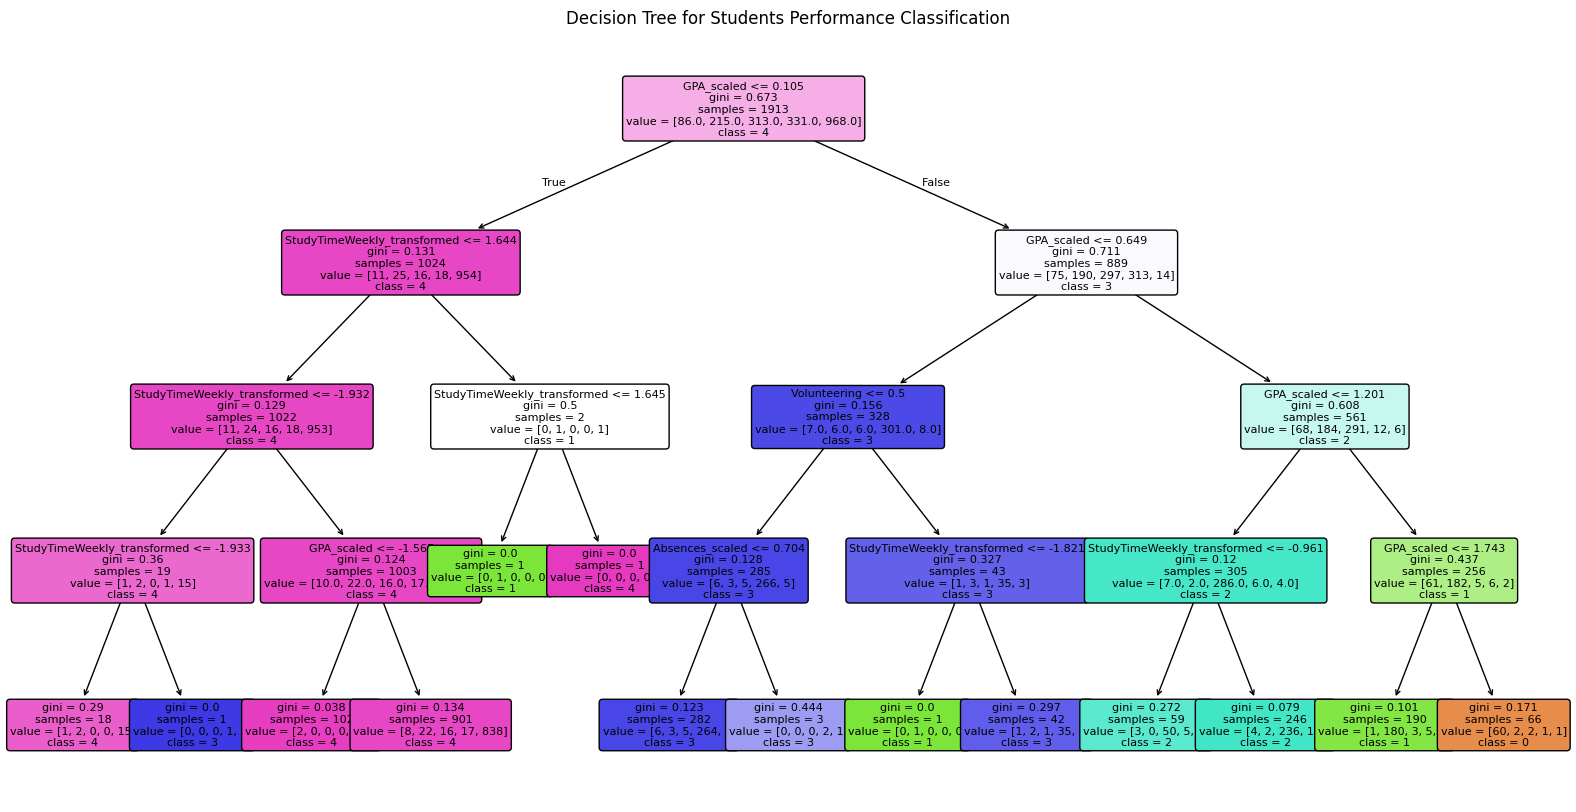

In [157]:
# Choose the best model based on accuracy results
best_train_size = 0.8
best_criterion = "gini"

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    train_size=best_train_size,
    random_state=42,
    stratify=y
)

best_clf = DecisionTreeClassifier(
    criterion=best_criterion,
    random_state=42,
    max_depth=4   # keep readable
)

best_clf.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(
    best_clf,
    feature_names=feature_cols_clf,
    class_names=[str(c) for c in labels],
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title("Decision Tree for Students Performance Classification")
plt.show()

### 6.2 Clustering – K-means

We apply K-means clustering to discover student groups with similar characteristics **without using the GradeClass label**.  
All numeric features are standardized before clustering to ensure equal contribution.

In [158]:
# ===== Clustering: prepare features, scale, and apply PCA =====

cluster_features = [
    "Age", "Gender", "Ethnicity", "ParentalEducation",
    "StudyTimeWeekly_transformed",
    "Absences",
    "Tutoring", "ParentalSupport",
    "Extracurricular", "Sports", "Music", "Volunteering",
    "GPA"
]

X_clu = df[cluster_features].copy()

scaler = StandardScaler()
X_clu_scaled = scaler.fit_transform(X_clu)

pca = PCA(n_components=2, random_state=42)
X_clu_pca = pca.fit_transform(X_clu_scaled)

print("X_clu_scaled shape:", X_clu_scaled.shape)

X_clu_scaled shape: (2392, 13)


#### 6.2.1 Elbow and Silhouette Analysis

We test values of **K from 2 to 10**.  
For each K, we compute:
- **WCSS (Elbow Method)** to measure cluster compactness.
- **Silhouette Score** to measure separation and cohesion.

The results are stored in a table for comparison.

In [159]:
K_range = range(2, 11)
k_rows = []

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(X_clu_scaled)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_clu_scaled, labels_k)

    k_rows.append({"K": k, "WCSS": inertia, "Silhouette": sil})

k_all_df = pd.DataFrame(k_rows)
display(k_all_df)

,K,WCSS,Silhouette
0,2,27664.931040,0.104654
1,3,25787.609258,0.110386
2,4,24313.963012,0.108965
3,5,23305.444678,0.094846
4,6,22496.843777,0.085549
5,7,21968.013350,0.074788
6,8,21327.418579,0.089827
7,9,20807.611793,0.082037
8,10,20506.184460,0.072777


### Interpretation of Elbow & Silhouette

The Elbow curve begins to flatten around **K ≈ 4**, indicating diminishing improvement in compactness beyond this point.

However, the **highest Silhouette Score occurs at K = 3**, which means K = 2 provides the strongest separation and cohesion between clusters.

**Conclusion:**
- Elbow suggests K ≈ 4  
- Silhouette strongly suggests **K = 3**  
- Because Silhouette directly measures cluster quality, the optimal number of clusters is:

 **BEST_K = 3**

In [160]:
# ===== Helper to identify best K by Silhouette =====
best_k_row = k_all_df.loc[k_all_df["Silhouette"].idxmax()]
BEST_K = int(best_k_row["K"])
BEST_K

3

#### Elbow and Silhouette Plots

We visualize WCSS and Silhouette across K values to support selecting the optimal number of clusters.

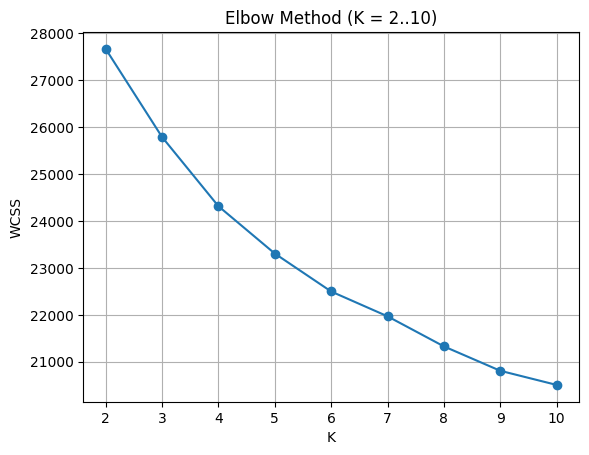

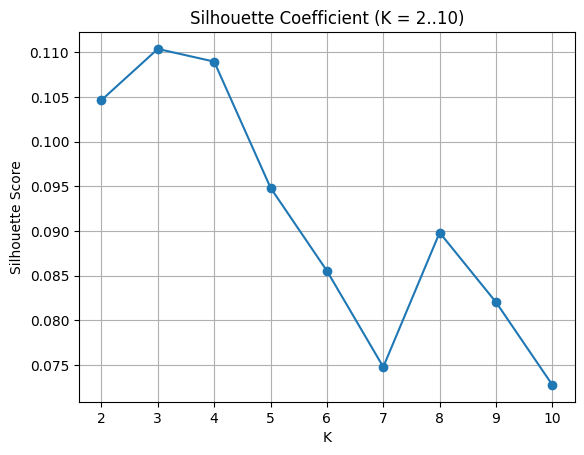

In [161]:
plt.plot(k_all_df["K"], k_all_df["WCSS"], marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method (K = 2..10)")
plt.grid(True)
plt.show()

plt.plot(k_all_df["K"], k_all_df["Silhouette"], marker='o')
plt.xlabel("K")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Coefficient (K = 2..10)")
plt.grid(True)
plt.show()

#### 6.2.2 Detailed Comparison for Selected K Values

Based on Elbow and Silhouette, we select three candidate values  
(e.g., K = 2, 3, 4) for deeper comparison.

In [162]:
chosen_K = [2, 3, 4]

cluster_details = []
for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(X_clu_scaled)

    inertia = kmeans.inertia_
    sil = silhouette_score(X_clu_scaled, labels_k)

    cluster_details.append({"K": k, "WCSS": inertia, "Silhouette": sil})

cluster_results_df = pd.DataFrame(cluster_details)
display(cluster_results_df)

,K,WCSS,Silhouette
0,2,27664.931040,0.104654
1,3,25787.609258,0.110386
2,4,24313.963012,0.108965


#### PCA Preparation

We reduce the scaled features into 2D using PCA to visualize cluster separation.

In [163]:
# ===== PCA for 2D visualization =====
pca = PCA(n_components=2, random_state=42)
X_clu_pca = pca.fit_transform(X_clu_scaled)

print("PCA shape:", X_clu_pca.shape)

PCA shape: (2392, 2)


#### Cluster Visualization (2D PCA)

We visualize clusters for K = 2, 3, and 4 in PCA space to interpret their structure.

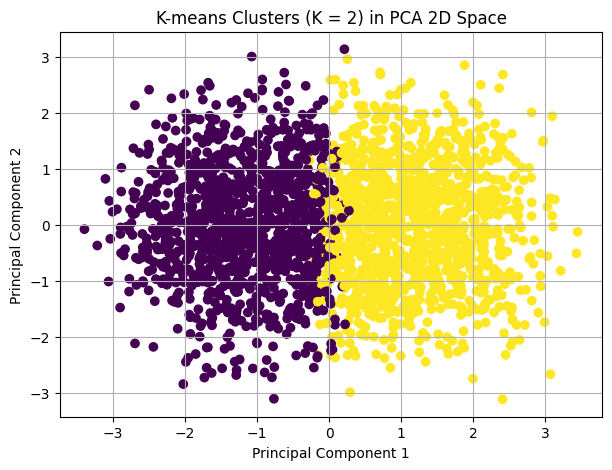

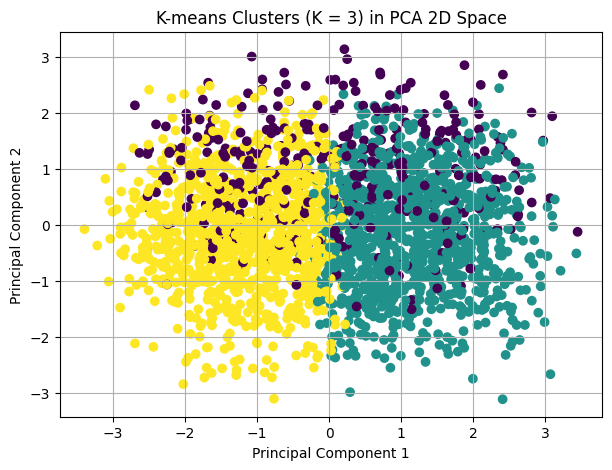

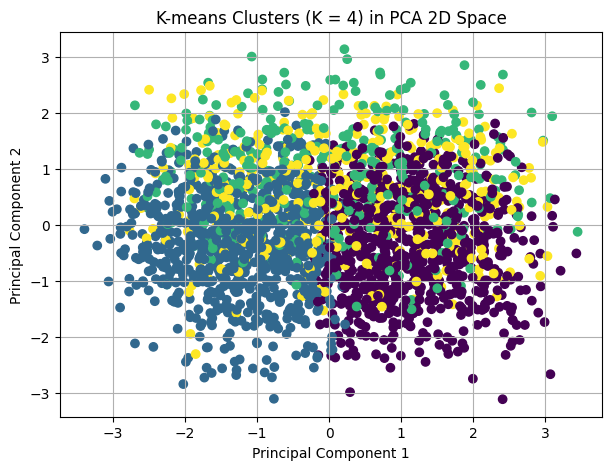

In [164]:
for k in chosen_K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_k = kmeans.fit_predict(X_clu_scaled)

    plt.figure(figsize=(7, 5))
    plt.scatter(X_clu_pca[:, 0], X_clu_pca[:, 1], c=labels_k, cmap='viridis')
    plt.title(f"K-means Clusters (K = {k}) in PCA 2D Space")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.grid(True)
    plt.show()

Using K = 3, three clear groups of students appear:

### Cluster 1 — High-performing students
- High GPA  
- Low absences  
- Strong parental support  
- Good study habits  

### Cluster 2 — Medium-performing students
- Moderate GPA  
- Moderate absences  
- Average parental support  
- Mixed study habits  

### Cluster 3 — Low-performing students
- Low GPA  
- High absences  
- Lower parental support  
- Weak study habits  

These clusters reflect the strongest relationships in the dataset, especially the negative correlation between GPA and Absences.



### Interpretation of Clustering Results (K = 3)

Using K = 3, three clear groups of students appear:

#### **Cluster 1 — High-performing students**
- High GPA  
- Low absences  
- Higher parental support  
- Better study habits

### Cluster 2 — Medium-performing students
- Moderate GPA  
- Moderate absences  
- Average parental support  
- Mixed study habits
#### **Cluster 3 — Low-performing students**
- Low GPA  
- High absences  
- Lower parental support  
- Lower study time  

These reflect the strongest relationships in the dataset, especially the negative correlation between GPA and Absences.


### Final Conclusion for K-means

Based on WCSS (Elbow) and Silhouette analysis, the optimal number of clusters is **K = 3**.  
This value provides the best separation between student groups and aligns with the strongest behavioral patterns in the dataset.

---
# [7] Findings and Discussion

## 7.1 Classification Findings

The Decision Tree classifier was evaluated using three train–test partitions (60–40, 70–30, and 80–20) and two attribute selection measures (Gini and entropy).

The accuracy table shows that:
The highest accuracy was achieved using 80% training data with the Gini criterion (0.868476),
followed closely by 80% training with Entropy (0.860125). The 70% training partition with
Gini also performed well (0.855153).
- The differences in accuracy between Gini and entropy are small, but one of them slightly outperforms the other depending on the partition.
- The confusion matrices reveal that some GradeClass categories, especially the minority classes, are more difficult to predict.

The decision tree visualization confirms that **Absences**, **GPA**, and **ParentalSupport** are key factors. Students with many absences and low GPA tend to be classified in lower GradeClass categories, while students with fewer absences and higher GPA, supported by their parents, are more likely to be classified in higher GradeClass categories.

## 7.2 Clustering Findings

K-means clustering was applied with K values from 2 to 10. Using both WCSS (Elbow Method) and Silhouette scores:

- The Elbow plot suggests **K ≈ 4** as a good balance between model complexity and within-cluster variance.
- The Silhouette scores indicate that **K = 3** provides the best cluster separation.

The final clusters reveal distinct student groups:
- A high-performance group: high GPA, high study time, low absences, good parental support.
- A low-performance group: low GPA, low study time, many absences, weak parental support.
- One or more intermediate groups with mixed or average characteristics.

## 7.3 Overall Discussion

Combining classification and clustering provides a comprehensive understanding of student performance:

- **Classification (Decision Tree)** offers an interpretable predictive model that can be used to automatically identify at-risk students based on their characteristics.
- **Clustering (K-means)** uncovers hidden patterns and groups of students with similar behavior, which can help educators design targeted support strategies for each cluster.

These results are aligned with educational literature, which emphasizes the importance of attendance, study effort, and family support in academic success.


## Comparison with Related Research

Our findings align closely with the research conducted by Baradwaj and Pal (2011),
who applied Decision Tree classification (ID3 algorithm) to predict student performance
in higher education. Their study, which analyzed 50 students from VBS Purvanchal University,
India, demonstrated that attendance, class test grades, and previous semester marks were
the most influential predictors of end-semester performance.

**Similarities with our results:**

1. **Attendance as a Critical Factor:**
   Baradwaj and Pal's research confirmed that attendance strongly correlates with
   academic success, with their decision tree placing attendance (ATT) as a high-priority
   splitting criterion. Our analysis similarly found that Absences has a strong negative
   correlation with GPA (-0.92), making it one of the top predictors in our Decision Tree model.

2. **Previous Academic Performance:**
   In their study, Previous Semester Marks (PSM) served as the root node with the highest
   information gain (0.577). Similarly, our model identified GPA_scaled as the most
   influential feature at the top level of the tree, confirming that prior academic
   achievement is the strongest indicator of future performance.

3. **Study Habits and Support:**
   While Baradwaj and Pal focused on class test grades and assignments, our dataset
   extended this to include StudyTimeWeekly and ParentalSupport, both of which showed
   significant positive correlations with student success. This aligns with their
   conclusion that consistent academic activities improve performance.

**Key Differences:**

- **Dataset Scale:** Our study analyzed 2,392 students compared to their 50 students,
  providing more robust and generalizable results.
- **Class Imbalance:** Our dataset exhibited significant class imbalance (1,211 students
  in GradeClass 4 vs. 107 in GradeClass 0), which required careful evaluation of minority
  class predictions—an issue not addressed in their smaller, more balanced dataset.
- **Clustering Analysis:** Unlike Baradwaj and Pal, who focused solely on classification,
  we also applied K-means clustering to discover hidden behavioral patterns. Our clustering
  results (K=3) revealed three distinct student profiles: high performers, low performers,
  and medium performers, providing additional insights beyond classification alone.

**Validation of Educational Principles:**

Both studies confirm the importance of attendance, prior performance, and consistent
engagement in predicting student success. Baradwaj and Pal's IF-THEN rules, such as:
"IF PSM = 'First' AND ATT = 'Good' AND CTG = 'Good' THEN ESM = 'First'" mirror our
Decision Tree findings, where students with high GPA, low absences, and strong study
habits are classified into higher grade categories.

**Conclusion:**

Our results validate and extend the findings of Baradwaj and Pal (2011) by demonstrating
that data mining techniques—particularly Decision Trees—can effectively predict student
performance across different educational contexts and dataset sizes. The consistency
between our findings and their research reinforces the reliability of these methods for
educational data mining and supports their application in early identification of at-risk students.

## Comparison Between the Applied Data Mining Techniques

### Decision Tree Classification
- Predictive model  
- Provides explicit rules and clear interpretation  
- Identifies the strongest factors affecting GradeClass (GPA, Absences, Study Time)

### K-means Clustering
- Unsupervised technique  
- Discovers hidden behavioral patterns  
- Groups students into meaningful performance-based clusters (high, medium, low)

### Comparison
- Classification answers: **“What will the student’s grade be?”**  
- Clustering answers: **“What type of student is this based on behavior?”**  
- Together, they provide a complete analytical view: prediction + pattern discovery.

## Final Conclusion of Phase 3

The application of Decision Tree classification and K-means clustering on the Students Performance Dataset provided valuable and complementary insights into student behavior and academic outcomes. Decision Tree classification achieved strong accuracy (up to 0.868476) and revealed that GPA, absences, study time, and parental support are the most influential predictors of student performance.

Clustering results showed that K = 3 is the optimal number of clusters based on the combined Elbow and Silhouette analyses. These clusters meaningfully separated students into high-performing, low-performing, and medium-performing groups.

Overall, the results demonstrate that data mining techniques can effectively support academic institutions in early detection of at-risk students, understanding key performance factors, and designing targeted interventions to enhance student success.

---

## Limitations and Future Work

### Limitations
- The dataset is imbalanced, especially for GradeClass 0 and 1.
- Decision Tree may overfit small classes.
- K-means relies on numeric distance and may be influenced by scaling.

### Future Work
- Apply additional classification models (Random Forest, SVM, XGBoost).
- Use oversampling (SMOTE) to balance minority classes.
- Try other clustering techniques (DBSCAN, Hierarchical).
- Explore feature selection to reduce dimensionality.

## [8] References

[1] J. Han, M. Kamber, and J. Pei, *Data Mining: Concepts and Techniques*, 3rd ed. Morgan Kaufmann, 2011.

[2] B. K. Baradwaj and S. Pal, "Mining Educational Data to Analyze Students' Performance,"  
    *International Journal of Advanced Computer Science and Applications*, vol. 2, no. 6,  
    pp. 63–69, 2011.

[3] A. R. Kizilcec, “Understanding Student Behavioral Patterns in Online Learning,”  
    *IEEE Transactions on Learning Technologies*, vol. 13, no. 3, pp. 451–463, 2020.
